# 02 — Introduction (extended), GMMs and SVMs

This notebook extends the introduction from the last notebook and continues with GMMs and SVMs.

As before, 
1. add the unmodified notebook to a new (or the former) git-repo
2. run all notebook cells in order and commit files it generates (if any)
3. adjust the notebook according to the exercies, answer questions in the provided MD-cells, 
4. run all notebook cells in order
5. commit the changed notebook
6. commit files it generates (if any)

upload a git-bundle of your repo to StudIP \
BearbeitetePraktikumsaufgaben/Praktikum09\
till __7.1.21 18:00__

# Iris dataset

### Loading the data

The [Iris dataset](https://archive.ics.uci.edu/ml/datasets/iris) is so popular that scikit-learn can load it out-of-the-box:

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn import datasets

iris = datasets.load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
X.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


### Exercise 1b
Plot the data of only the first two dimension, labelling the axes according to the plotted quantities. [This](https://stackoverflow.com/questions/13187778/convert-pandas-dataframe-to-numpy-array#54508052) might be helpful.

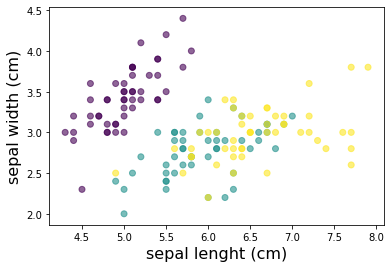

In [2]:
## plot first two dimension
plt.scatter(X.values[:,0], X.values[:,1], c=iris.target, alpha=0.6)
plt.xlabel('sepal lenght (cm)', fontsize=16)
plt.ylabel('sepal width (cm)', fontsize=16)
plt.show();

### Exercise 1c
Plot the data of only the last two dimension, labelling the axes according to the plotted quantities.

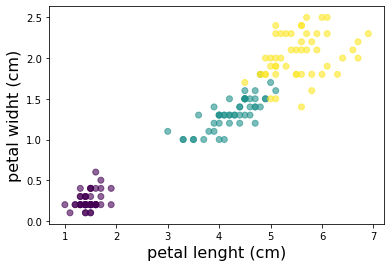

In [3]:
## plot last two dimension
plt.scatter(X.values[:,2], X.values[:,3], c=iris.target, alpha=0.6)
plt.xlabel('petal lenght (cm)', fontsize=16)
plt.ylabel('petal widht (cm)', fontsize=16)
plt.show();

### Exercise 1d
Use the [mplot3d module](https://matplotlib.org/3.1.1/gallery/mplot3d/scatter3d.html) to create a 3D plot the data using the first three dimension, labelling the axes according to the plotted quantities.

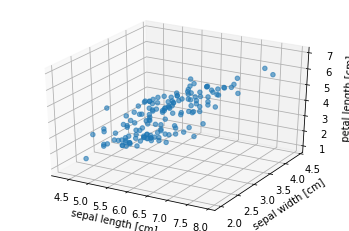

In [4]:
## static 3D plot with labelled axes
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X.values[:,0], X.values[:,1], X.values[:,2], alpha=0.6)
ax.set_xlabel('sepal length [cm]')
ax.set_ylabel('sepal width [cm]')
ax.set_zlabel('petal length [cm]')

plt.show();

basing on the previous notebook here, __focusing on labelling the axes in the plot__:

### Principal Component Analysis

As you can see, the dataset has 4 numerical features (dimensions). If we want to show all the information in a 2D plot, we have to perform a dimensionality reduction first. We will use [scikit-learn's implementation of PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) for this.

### Exercise 2

Use PCA to transform the original data into 2 dimensions and show the transformed data in a scatter plot, with the colors of each data point corresponding to the `target` value.\
__Also annotate the axes with their labels again.__

In [5]:
## do PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
P = pca.fit_transform(X)
P.shape

(150, 2)

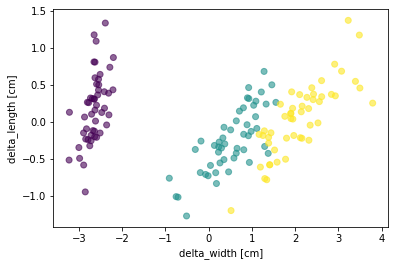

In [6]:
## create scatter plot of PCA output
plt.scatter(P[:, 0], P[:, 1], c=iris.target, alpha=0.6)
plt.xlabel('delta_width [cm]')
plt.ylabel('delta_length [cm]')
plt.show();

### Exercise 2b
Now create a 3D scatter plot again (in the order 2,0,1), enabling interactions with `%matplotlib notebook` ([see here](https://stackoverflow.com/questions/38364435/python-matplotlib-make-3d-plot-interactive-in-jupyter-notebook#38865534), [does not work in JupyterLab](https://stackoverflow.com/questions/51922480/javascript-error-ipython-is-not-defined-in-jupyterlab)) and orient the 3D view such that it resembles the 2D plot of the PCA.\
Then fix the 3D view to the found azimuth and elevation with [`view_init`](https://stackoverflow.com/questions/12904912/how-to-set-camera-position-for-3d-plots-using-python-matplotlib#12905458).

### Question
There are (at least) two reasons why the 3D viw can only look similar to the 2D PCA plot. Do you know why? Explain!

### Answers
1. Durch das Transformieren in einen 2D-Plot fallen Informationen einer Achse weg. Das hat zur Auswirkung, dass Informationen zu dieser Achse nicht ablesbar sind, da sie in 2-Achsen abgebildet wird.
2. Der 2D-Plot hat nur eine Draufsicht. Dadurch sieht man die Verteilung nur in einer Ebene und nicht räumlich.
3. Die Ansicht ist auch abhänig von der Rotation des 3D Graphen. Manche Punkte werden verdeckt. Bei unterscheidlichen Betrachtungswinkeln, sieht die Verteilung auch unterschiedlich aus.

<IPython.core.display.Javascript object>


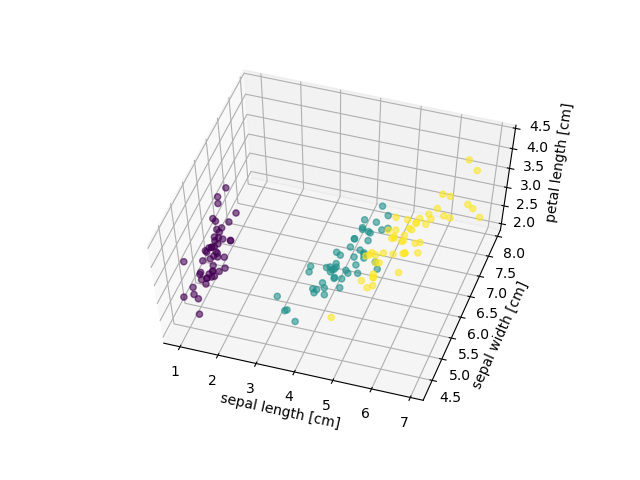

In [24]:
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X.values[:, 2], X.values[:, 0], X.values[:, 1], c=iris.target, alpha=0.6)
ax.view_init(elev=61, azim=-72)

ax.set_xlabel('sepal length [cm]')
ax.set_ylabel('sepal width [cm]')
ax.set_zlabel('petal length [cm]')

plt.show();

##azim=-72deg elev=61deg

In [25]:
## switch off interaction for the following plots
%matplotlib inline

### Exercise 3

Now try to separate the clusters with scikit-learn's implementation of [K-Means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) once with the 2D data from the PCA and once with the original 4D data.

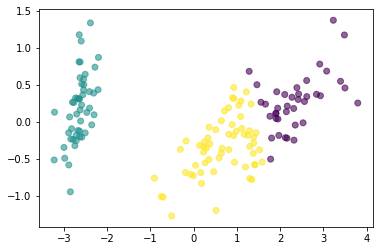

In [9]:
## K-means on 2D PCA output, just copy your solution from last notebook
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters = 3 , random_state = 42).fit(P)
plt.scatter(P[:,0], P[:,1], c=k_means.labels_, alpha=0.6)
plt.show();

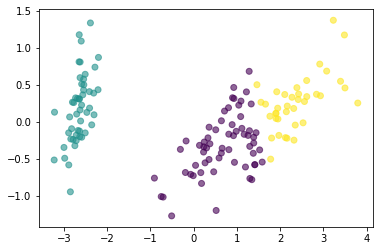

In [10]:
## K-means on orig 4D data, just copy your solution from last notebook
k_means = KMeans(n_clusters = 3 , random_state = 42).fit(X)
P=pca.fit_transform(X)

plt.scatter(P[:, 0], P[:, 1], c=k_means.labels_, alpha=0.6)  
plt.show();

### Exercise 4

Now try to separate the clusters with scikit-learn's implementation of [DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) again once with the 2D data from the PCA and once with the original 4D data, (you may stop trying to find apropriate parameters after 10 minutes).

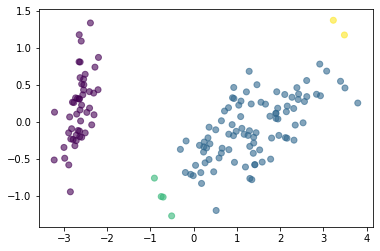

In [11]:
## DBSCAN on 2D PCA output, just copy your solution from last notebook
from sklearn.cluster import DBSCAN

dbs = DBSCAN(eps=0.5,min_samples = 2).fit(P)
plt.scatter(P[:,0], P[:,1], c=dbs.labels_, alpha=0.6)
plt.show();

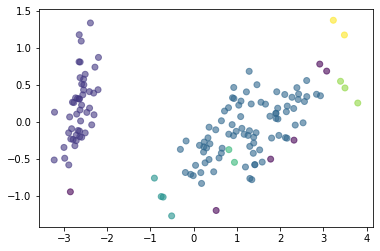

In [12]:
## DBSCAN on orig 4D data, just copy your solution from last notebook
dbs_4D = DBSCAN(eps=0.5,min_samples=2).fit(X)
DBS = pca.fit_transform(X)

plt.scatter(DBS[:, 0], DBS[:, 1], c=dbs_4D.labels_, alpha=0.6)
plt.show();

### Exercise 5

Try if scaling the data to a common mean and standard deviation helps to separate the clusters with DBSCAN in 4D.\
Use the [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)  for scaling and check the statistics of the scaled features with pandas [describe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html).


In [13]:
## scale orig 4D data with StandardScaler and output the statistics of the scaled features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

S = scaler.fit_transform(X)
print(scaler.fit(X))
S_DATA = pd.DataFrame(S, columns=iris.feature_names)
S_DATA.describe()

StandardScaler(copy=True, with_mean=True, with_std=True)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-1.468455e-15,-1.823726e-15,-1.610564e-15,-9.473903e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00


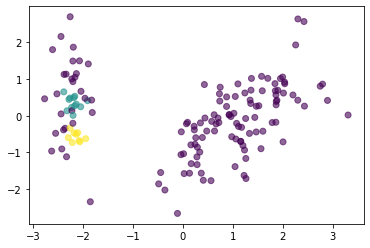

In [14]:
## DBSCAN on scaled 4D data
from sklearn import decomposition

dbs_2 = DBSCAN(eps=0.3, min_samples=6, metric='euclidean').fit(S)
dbs_scaled = decomposition.PCA(n_components=2).fit_transform(S)

plt.scatter(dbs_scaled[:,0], dbs_scaled[:,1], c=dbs_2.labels_, alpha=0.6)
plt.show();

### Exercise 6

Now test a Gaussian Mixture Models (GMMs) ([GaussianMixture](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html)) and plot it side-by-side (as above for the blobs) with the actual labels (as color).

In [15]:
## apply a GMM assuming 3 clusters
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, random_state=0).fit(X)
gm_2 = gm.predict(X)

Text(0.5, 1.0, 'Original')

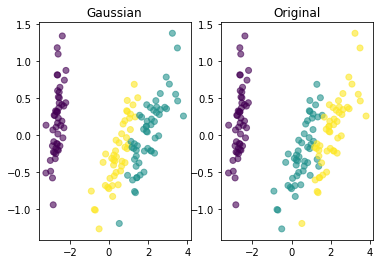

In [16]:
## scatter plot using the GMM labels side-by-side to a scatter plot with the original lables (as color)
fig, (p1, p2) = plt.subplots(1, 2)
p1.scatter(DBS[:,0], DBS[:,1], c=gm_2, alpha=0.6);
p1.set_title("Gaussian")
p2.scatter(DBS[:,0], DBS[:,1], c=iris.target, alpha=0.6);
p2.set_title("Original")

## Support Vector Machines (SVMs)

All ML methods above did not make use of the labels (only used for coloring). 
Now make use of the labels of the dataset to train a supervised ML method, like an SVM. Use the following function [plot_predictions](https://nbviewer.jupyter.org/github/ageron/handson-ml2/blob/master/05_support_vector_machines.ipynb#Non-linear-classification
) for visualizing the decision boundaries of the trained SVM.

In [17]:
## from https://nbviewer.jupyter.org/github/ageron/handson-ml2/blob/master/05_support_vector_machines.ipynb#Non-linear-classification
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)#variable erstellt mit (Start Ende Step)
    x1s = np.linspace(axes[2], axes[3], 100)#variable erstellt mit (Start Ende Step)
    x0, x1 = np.meshgrid(x0s, x1s)#zusammenführen von den gittern definiert in linespace
    X = np.c_[x0.ravel(), x1.ravel()]#erstellen von einem 1D array aus den Beiden Vektoren
    y_pred = clf.predict(X).reshape(x0.shape)#Vorhersage 
    # y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)#zeichnen de Kontur mit den erstellten parametern
    # plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

### Exercise 7

Try to understand how the function `plot_predictions` works and explain each active code line by adding a trailing comment.


### Exercise 8

Next fit the PCA data (2D) with a linear SVM. Use scikit-learn for that. If you get a \
`ConvergenceWarning: Liblinear failed to converge, increase the number of iterations`\
try e.g. `max_iter=1e6`, see: https://stackoverflow.com/questions/52670012/convergencewarning-liblinear-failed-to-converge-increase-the-number-of-iterati

Plot the decision boundaries of the trained SVM together with the colored training points (as before).

#### Quenstions
1. What effect has changing the hyper-parameter C? (Try e.g. 1, 10, 100)
2. How can you see from the plot, that a linear SVM. was used?

#### Answers
1. Verbessert die entscheidungslinie bei Vergrößerung
2. es sind nur gerade Linien

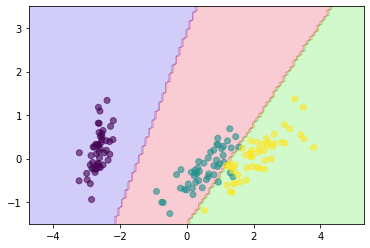

In [18]:
## train SVM with PCA data
from sklearn import svm

SMV = svm.SVC(kernel='linear', C=10)
SMV.fit(DBS, iris.target)
x_min, x_max = DBS.min()-1.5, DBS.max() +1.5
y_min, y_max = iris.target.min() - 1.5, iris.target.max() + 1.5
axes = [x_min, x_max, y_min, y_max]

## SVM here works OK without scaling because the PCA data is quite balanced

## plot decision boundaries and training data
plot_predictions(SMV, axes)
plt.scatter(DBS[:,0], DBS[:,1], c=iris.target, alpha =0.6);

### Exercise 9

Extend you SVM evaluation with `PolynomialFeatures` followed by a `StandardScaler`, for ideas how to do that look through:\
https://nbviewer.jupyter.org/github/ageron/handson-ml2/blob/master/05_support_vector_machines.ipynb#Non-linear-classification

Plot the decision boundaries of the trained SVM together with the colored training points (as before).

#### Quenstions
1. What effect has changing degree of the `PolynomialFeatures`? (Try e.g. 1, 2, 3, 5, 10, 20)
2. Why are we using the PCA data and not the original iris data?

#### Answers
1. bei höheren Zahlen wird die Abtrennung genauer und die Daten besser getrennt.
2. Eine Trennung in 4D wäre zu unübersichtlich.

/home/jan/anaconda3/envs/tf2/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


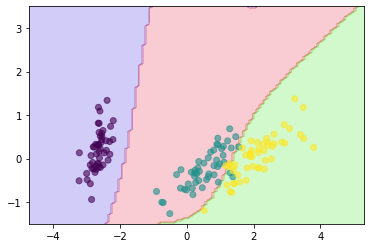

In [19]:
## train SVM with PolynomialFeatures (which probably need scaling)

from sklearn import svm

SMV = svm.SVC(kernel='poly', C=10)
SMV.fit(DBS, iris.target)
x_min, x_max = DBS.min()-1.5, DBS.max() +1.5
y_min, y_max = iris.target.min() - 1.5, iris.target.max() + 1.5
axes = [x_min, x_max, y_min, y_max]

## SVM here works OK without scaling because the PCA data is quite balanced

## plot decision boundaries and training data
plot_predictions(SMV, axes)
plt.scatter(DBS[:,0], DBS[:,1], c=iris.target, alpha =0.6);

## Splitting the dataset for training and testing

By holding back some of the data during the training of ML models, the remaining data can be used to evaluate the performance of the resulting model. This is often called testing. This has the disadvantage, that not all data can be used for training.

### Exercise

Use sklearn's `train_test_split` to split the iris dataset into a training dataset (75%) and a testing dataset (25%).\
Then train your linear and polynomial SVMs on the reduced training dataset and then check their performance with the `score()` function of each classifier.

In [20]:
## load and apply train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, iris.target, test_size=0.25, random_state=42)

## report the sizes of the resulting training and testing datasets
print(f"X_train_shape: {X_train.shape} y_train_shape: {y_train.shape}")
print(f"X_test_shape: {X_test.shape} y_test_shape: {y_test.shape}")
X_train_neu= decomposition.PCA(n_components=2).fit_transform(X_train)
X_test_neu = decomposition.PCA(n_components=2).fit_transform(X_test)

X_train_shape: (112, 4) y_train_shape: (112,)
X_test_shape: (38, 4) y_test_shape: (38,)


Linear SVM: 0.868421052631579


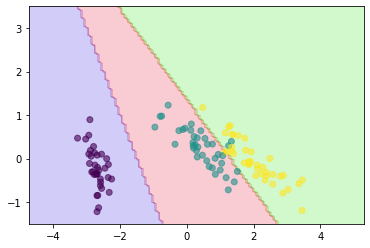

In [21]:
## train and evaluate the resulting linear SVM model
SMV_l = svm.SVC(kernel='linear', C=10)
SMV_l.fit(X_train_neu, y_train)
x_min, x_max = DBS.min() -1.5, DBS.max() +1.5
y_min, y_max = y_train.min() - 1.5, y_train.max()+1.5
axes= [x_min, x_max, y_min, y_max]
plot_predictions(SMV_l, axes)
plt.scatter(X_train_neu[:,0], X_train_neu[:,1], c=y_train, alpha=0.6);
print(f"Linear SVM: {SMV_l.score(X_test_neu, y_test)}")

poly SVM: 0.8421052631578947


/home/jan/anaconda3/envs/tf2/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


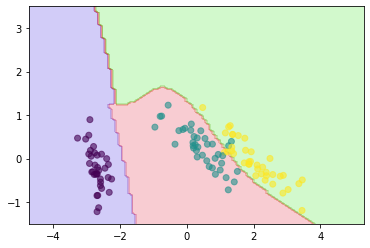

In [22]:
## train and evaluate the resulting polynomial SVM model
SMV_p = svm.SVC(kernel='poly', C=10)
SMV_p.fit(X_train_neu, y_train)
x_min, x_max = DBS.min() -1.5, DBS.max() +1.5
y_min, y_max = y_train.min() - 1.5, y_train.max()+1.5
axes= [x_min, x_max, y_min, y_max]
plot_predictions(SMV_p, axes)
plt.scatter(X_train_neu[:,0], X_train_neu[:,1], c=y_train, alpha=0.6);
print(f"poly SVM: {SMV_p.score(X_test_neu, y_test)}")

To avoid problems from this *static* separation into train and test datasets, it is possible to divide the full dataset into e.g. 4 (nearly) equally sized subsets (called folds). Then it is possible to use each fold once as test set and the other folds for training, a kid of *dynamic* separation. This technique is called cross-validation (CV).

### Exercise

Scoring a classifier in sklearn with CV can be done with `cross_val_score`. Print the scores CV yields for the linear and the polynomial SVM.

In [23]:
## apply cross_val_score on both SVMs and report their scores
from sklearn.model_selection import cross_val_score

print(f"Linear SVM mit CV Score {cross_val_score(SMV_l, X, iris.target, cv=2)}")
print(f"Polynominal SVM mit CV Score {cross_val_score(SMV_p, X,iris.target, cv=2)}")

Linear SVM mit CV Score [0.97333333 0.98666667]
Polynominal SVM mit CV Score [0.98666667 0.93333333]


/home/jan/anaconda3/envs/tf2/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jan/anaconda3/envs/tf2/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Be aware, that the differing scores just arise from using the different training subsets!

The ability to score differntly trained models also bings a way to test models differing in their hyper-parameters. This allows to "automatically" determin the best combination of a set of various hyper-parameters (called grid). This is called `GridSearchCV` in sklearn. Using only a random subset of this grid (to reduce the total computation load) is provided by `RandomizedSearchCV`. 